In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

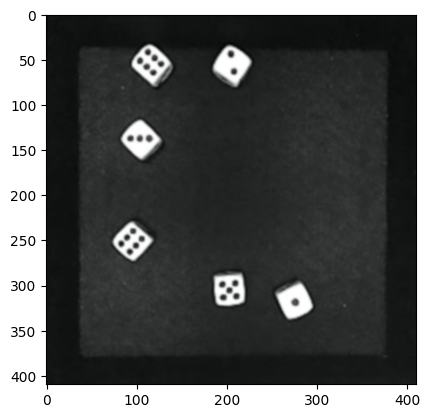

array([[255, 160,   0, ...,   0,   0,   0],
       [255, 170,   0, ...,   0,  10,  16],
       [255, 182,   0, ...,  32,  66,  76],
       ...,
       [  0,   8,  30, ...,   0,  16,  24],
       [ 16,  22,  16, ...,   0,   0,   0],
       [ 32,  24,   0, ...,   0,   0,   0]], dtype=uint8)

In [20]:
orig_image = cv2.imread('photos/dice_blackbg.jpg')
img2 = orig_image

img2 = cv2.GaussianBlur(img2, (5,5), 1)
plt.imshow(img2)
plt.show()

gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

cv2.Laplacian(gray, cv2.CV_8UC1, gray, ksize = 5)

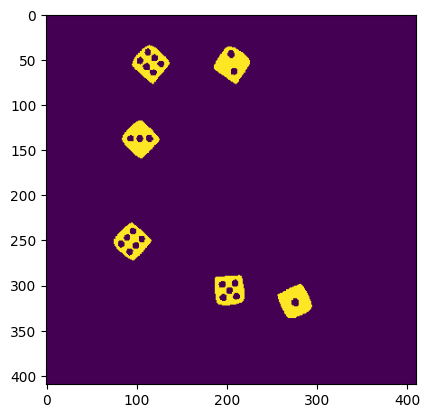

In [30]:
img = cv2.imread('photos/dice_blackbg.jpg')
roi = img

gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
Blur = cv2.GaussianBlur(gray, (5,5), 1)
ret, binarized = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

plt.imshow(binarized[:,:,0])
plt.show()

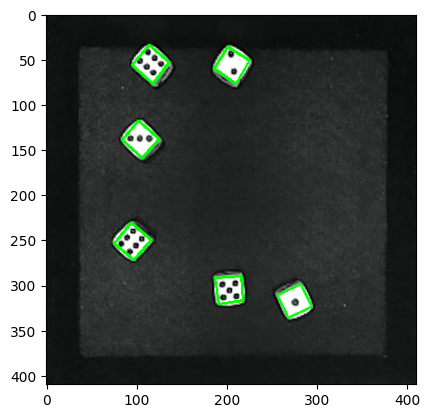

In [39]:
contours = cv2.findContours(binarized[:,:,0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]

cornerRect = []
for i in contours:
    epsilon = 0.05*cv2.arcLength(i,True)
    approx = cv2.approxPolyDP(i,epsilon,True)
    if len(approx) == 4:
        cornerRect.append(approx)
        cv2.drawContours(img, cornerRect,-1,(0,255,0),2)
        plt.imshow(img)

In [37]:
print(cornerRect)

[array([[[282, 299]],

       [[256, 311]],

       [[268, 336]],

       [[294, 324]]], dtype=int32), array([[[216, 290]],

       [[187, 292]],

       [[191, 321]],

       [[218, 317]]], dtype=int32), array([[[ 94, 231]],

       [[ 75, 254]],

       [[ 97, 272]],

       [[116, 250]]], dtype=int32), array([[[102, 118]],

       [[ 84, 139]],

       [[106, 159]],

       [[125, 138]]], dtype=int32), array([[[201,  36]],

       [[186,  60]],

       [[210,  77]],

       [[225,  51]]], dtype=int32), array([[[114,  34]],

       [[ 95,  56]],

       [[118,  77]],

       [[136,  53]]], dtype=int32)]


In [ ]:
centerRect = []